**Project 2: Implementing LSTMs and their variations. (Part 2)**

**Teammates: Juilee Rege (jrege3) and Katha Chanda (kchanda3)**

Due Date: 3rd May 2017

In this section of the extra credit, we have implemented LSTMs on multiclass classification by attempting to create language detectors for 4 languages, namely English, French, Dutch and Portugese. The data source is a subset of files which were given to us in the homework pdf. We have trained 4 models for each of these languages, using 5 iterations and 5 epochs. We have also used a max length of 40 characters to train the models and then generated 100 5-character test strings to test the prediction probabilities by again sending the previous 40 characters to the models. At the end, we have plotted the confusion matrix depicting how many of each language's test strings were classified correctly.

In [24]:
import tensorflow as tf
import keras
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Merge
from keras.optimizers import RMSprop, SGD
from keras.utils.data_utils import get_file
import numpy as np
from sklearn.metrics import *
from sklearn.metrics import *
from sklearn import metrics
import matplotlib.pyplot as plt
import math
import random
import sys
import os


In [2]:
X_eng = open("eng.txt").read().lower()
print('X_eng length:', len(X_eng))

X_frn = open("frn.txt").read().lower()
print('X_frn length:', len(X_frn))

X_dut = open("dut.txt").read().lower()
print('X_dut length:', len(X_dut))

X_por = open("por.txt").read().lower()
print('X_por length:', len(X_por))

X_eng length: 10746
X_frn length: 12009
X_dut length: 12887
X_por length: 11459


In [3]:
#### for english #####
numberE = int(0.80 * len(X_eng))
X_train_eng = X_eng[:numberE]
X_val_eng = X_eng[numberE:]
print ("English")
print ("training set contains ", len(X_train_eng), " characters")
print ("validation set contains ", len(X_val_eng), " characters")
print ("")
#### for french #####
numberF = int(0.80 * len(X_frn))
X_train_frn = X_frn[:numberF]
X_val_frn = X_frn[numberF:]
print ("French")
print ("training set contains ", len(X_train_frn), " characters")
print ("validation set contains ", len(X_val_frn), " characters")
print ("")

#### for dutch #####
numberD = int(0.80 * len(X_dut))
X_train_dut = X_dut[:numberD]
X_val_dut = X_dut[numberD:]
print ("Dutch")
print ("training set contains ", len(X_train_dut), " characters")
print ("validation set contains ", len(X_val_dut), " characters")
print ("")
#### for Portugese #####
numberP = int(0.80 * len(X_por))
X_train_por = X_por[:numberP]
X_val_por = X_por[numberP:]
print ("Portugese")
print ("training set contains ", len(X_train_por), " characters")
print ("validation set contains ", len(X_val_por), " characters")
print ("")

English
training set contains  8596  characters
validation set contains  2150  characters

French
training set contains  9607  characters
validation set contains  2402  characters

Dutch
training set contains  10309  characters
validation set contains  2578  characters

Portugese
training set contains  9167  characters
validation set contains  2292  characters



In [4]:
charsE = sorted(list(set(X_eng)))
charsF = sorted(list(set(X_frn)))
charsD = sorted(list(set(X_dut)))
charsP = sorted(list(set(X_por)))
chars = set(charsE+charsF+charsD+charsP)
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 59


In [5]:
#### for english ####
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences_trainE = []
next_chars_trainE = []
for i in range(0, len(X_train_eng) - maxlen, step):
    sentences_trainE.append(X_train_eng[i: i + maxlen])
    next_chars_trainE.append(X_train_eng[i + maxlen])
print('nb sequences:', len(sentences_trainE))

maxlen = 40
step = 3
sentences_valE = []
next_chars_valE = []
for i in range(0, len(X_val_eng) - maxlen, step):
    sentences_valE.append(X_val_eng[i: i + maxlen])
    next_chars_valE.append(X_val_eng[i + maxlen])
print('nb sequences:', len(sentences_valE))

#### for french ####
maxlen = 40
step = 3
sentences_trainF = []
next_chars_trainF = []
for i in range(0, len(X_train_frn) - maxlen, step):
    sentences_trainF.append(X_train_frn[i: i + maxlen])
    next_chars_trainF.append(X_train_frn[i + maxlen])
print('nb sequences:', len(sentences_trainF))

maxlen = 40
step = 3
sentences_valF = []
next_chars_valF = []
for i in range(0, len(X_val_frn) - maxlen, step):
    sentences_valF.append(X_val_frn[i: i + maxlen])
    next_chars_valF.append(X_val_frn[i + maxlen])
print('nb sequences:', len(sentences_valF))

#### for dutch ####
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences_trainD = []
next_chars_trainD = []
for i in range(0, len(X_train_dut) - maxlen, step):
    sentences_trainD.append(X_train_dut[i: i + maxlen])
    next_chars_trainD.append(X_train_dut[i + maxlen])
print('nb sequences:', len(sentences_trainD))

maxlen = 40
step = 3
sentences_valD = []
next_chars_valD = []
for i in range(0, len(X_val_dut) - maxlen, step):
    sentences_valD.append(X_val_dut[i: i + maxlen])
    next_chars_valD.append(X_val_dut[i + maxlen])
print('nb sequences:', len(sentences_valD))

#### for portugese ####
maxlen = 40
step = 3
sentences_trainP = []
next_chars_trainP = []
for i in range(0, len(X_train_por) - maxlen, step):
    sentences_trainP.append(X_train_por[i: i + maxlen])
    next_chars_trainP.append(X_train_por[i + maxlen])
print('nb sequences:', len(sentences_trainP))

maxlen = 40
step = 3
sentences_valP = []
next_chars_valP = []
for i in range(0, len(X_val_por) - maxlen, step):
    sentences_valP.append(X_val_por[i: i + maxlen])
    next_chars_valP.append(X_val_por[i + maxlen])
print('nb sequences:', len(sentences_valP))

nb sequences: 2852
nb sequences: 704
nb sequences: 3189
nb sequences: 788
nb sequences: 3423
nb sequences: 846
nb sequences: 3043
nb sequences: 751


In [6]:
#### for english ####
print('Vectorization...')
X_train_eng_vec = np.zeros((len(sentences_trainE), maxlen, len(chars)), dtype=np.bool)
y_train_eng_vec = np.zeros((len(sentences_trainE), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_trainE):
    for t, char in enumerate(sentence):
        X_train_eng_vec[i, t, char_indices[char]] = 1
    y_train_eng_vec[i, char_indices[next_chars_trainE[i]]] = 1

X_val_eng_vec = np.zeros((len(sentences_valE), maxlen, len(chars)), dtype=np.bool)
y_val_eng_vec = np.zeros((len(sentences_valE), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_valE):
    for t, char in enumerate(sentence):
        X_val_eng_vec[i, t, char_indices[char]] = 1
    y_val_eng_vec[i, char_indices[next_chars_valE[i]]] = 1

#### for french ####
print('Vectorization...')
X_train_frn_vec = np.zeros((len(sentences_trainF), maxlen, len(chars)), dtype=np.bool)
y_train_frn_vec = np.zeros((len(sentences_trainF), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_trainF):
    for t, char in enumerate(sentence):
        X_train_frn_vec[i, t, char_indices[char]] = 1
    y_train_frn_vec[i, char_indices[next_chars_trainF[i]]] = 1

X_val_frn_vec = np.zeros((len(sentences_valF), maxlen, len(chars)), dtype=np.bool)
y_val_frn_vec = np.zeros((len(sentences_valF), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_valF):
    for t, char in enumerate(sentence):
        X_val_frn_vec[i, t, char_indices[char]] = 1
    y_val_frn_vec[i, char_indices[next_chars_valF[i]]] = 1

    #### for dutch ####
print('Vectorization...')
X_train_dut_vec = np.zeros((len(sentences_trainD), maxlen, len(chars)), dtype=np.bool)
y_train_dut_vec = np.zeros((len(sentences_trainD), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_trainD):
    for t, char in enumerate(sentence):
        X_train_dut_vec[i, t, char_indices[char]] = 1
    y_train_dut_vec[i, char_indices[next_chars_trainD[i]]] = 1

X_val_dut_vec = np.zeros((len(sentences_valD), maxlen, len(chars)), dtype=np.bool)
y_val_dut_vec = np.zeros((len(sentences_valD), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_valD):
    for t, char in enumerate(sentence):
        X_val_dut_vec[i, t, char_indices[char]] = 1
    y_val_dut_vec[i, char_indices[next_chars_valD[i]]] = 1

#### for portugese ####
print('Vectorization...')
X_train_por_vec = np.zeros((len(sentences_trainP), maxlen, len(chars)), dtype=np.bool)
y_train_por_vec = np.zeros((len(sentences_trainP), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_trainP):
    for t, char in enumerate(sentence):
        X_train_por_vec[i, t, char_indices[char]] = 1
    y_train_por_vec[i, char_indices[next_chars_trainP[i]]] = 1

X_val_por_vec = np.zeros((len(sentences_valP), maxlen, len(chars)), dtype=np.bool)
y_val_por_vec = np.zeros((len(sentences_valP), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_valP):
    for t, char in enumerate(sentence):
        X_val_por_vec[i, t, char_indices[char]] = 1
    y_val_por_vec[i, char_indices[next_chars_valP[i]]] = 1


Vectorization...
Vectorization...
Vectorization...
Vectorization...


In [7]:
#### for english ####
print('Build model...')
modelE = Sequential()
modelE.add(LSTM(128, input_shape=(maxlen, len(chars))))
modelE.add(Dense(len(chars)))
modelE.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
modelE.compile(loss='categorical_crossentropy', optimizer=optimizer)

#### for french ####
print('Build model...')
modelF = Sequential()
modelF.add(LSTM(128, input_shape=(maxlen, len(chars))))
modelF.add(Dense(len(chars)))
modelF.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
modelF.compile(loss='categorical_crossentropy', optimizer=optimizer)

#### for dutch ####
print('Build model...')
modelD = Sequential()
modelD.add(LSTM(128, input_shape=(maxlen, len(chars))))
modelD.add(Dense(len(chars)))
modelD.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
modelD.compile(loss='categorical_crossentropy', optimizer=optimizer)

#### for portugese ####
print('Build model...')
modelP = Sequential()
modelP.add(LSTM(128, input_shape=(maxlen, len(chars))))
modelP.add(Dense(len(chars)))
modelP.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
modelP.compile(loss='categorical_crossentropy', optimizer=optimizer)


Build model...
Build model...
Build model...
Build model...


In [8]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def sample_for_prediction(preds, temperature=1.2):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    return preds

In [9]:
X_val_tupleE = (X_val_eng_vec,y_val_eng_vec)
print (len(X_val_tupleE[0]))
X_val_tupleF = (X_val_frn_vec,y_val_frn_vec)
print (len(X_val_tupleF[0]))
X_val_tupleD = (X_val_dut_vec,y_val_dut_vec)
print (len(X_val_tupleD[0]))
X_val_tupleP = (X_val_por_vec,y_val_por_vec)
print (len(X_val_tupleP[0]))

704
788
846
751


In [10]:
#### for english ####
for iteration in range(0, 5):
    print()
    print('-' * 50)
    print('Iteration', iteration+1)
    modelE.fit(X_train_eng_vec, y_train_eng_vec, batch_size=128, epochs=5, validation_data=X_val_tupleE)

    start_index = random.randint(0, len(X_eng) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = X_eng[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(300):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = modelE.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

#### for french ####
for iteration in range(0, 5):
    print()
    print('-' * 50)
    print('Iteration', iteration+1)
    modelF.fit(X_train_frn_vec, y_train_frn_vec, batch_size=128, epochs=5, validation_data=X_val_tupleF)

    start_index = random.randint(0, len(X_frn) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = X_frn[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(300):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = modelF.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
    
#### for dutch ####
for iteration in range(0, 5):
    print()
    print('-' * 50)
    print('Iteration', iteration+1)
    modelD.fit(X_train_dut_vec, y_train_dut_vec, batch_size=128, epochs=5, validation_data=X_val_tupleD)

    start_index = random.randint(0, len(X_dut) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = X_dut[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(300):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = modelD.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

#### for portugese ####
for iteration in range(0, 5):
    print()
    print('-' * 50)
    print('Iteration', iteration+1)
    modelP.fit(X_train_por_vec, y_train_por_vec, batch_size=128, epochs=5, validation_data=X_val_tupleP)

    start_index = random.randint(0, len(X_por) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = X_por[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(300):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = modelP.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


--------------------------------------------------
Iteration 1
Train on 2852 samples, validate on 704 samples
Epoch 1/5
2852/2852 [==============================] - 8s - loss: 3.0936 - val_loss: 2.9440

In [11]:
def f(l, k, m, result=[]):
    if len(result) == m or len(l) == 0:
        return result
    else:
        if isinstance(l, str):
            l = [l]
        part_num = random.randint(0, len(l)-1)
        partition = l[part_num]
        start = random.randint(0, len(partition)-k)
        result.append(partition[start:start+k])
        l.remove(partition)
        l.extend([partition[:start], partition[start+k:]])
        return f([part for part in l if len(part) >= k], k, m, result)

def f1(l, k, m, result=[]):
    if len(result) == m or len(l) == 0:
        return result
    else:
        if isinstance(l, str):
            l = [l]
        part_num = random.randint(0, len(l)-1)
        partition = l[part_num]
        start = random.randint(0, len(partition)-k)
        result.append(partition[start:start+k])
        l.remove(partition)
        l.extend([partition[:start], partition[start+k:]])
        return f([part for part in l if len(part) >= k], k, m, result)
def f2(l, k, m, result=[]):
    if len(result) == m or len(l) == 0:
        return result
    else:
        if isinstance(l, str):
            l = [l]
        part_num = random.randint(0, len(l)-1)
        partition = l[part_num]
        start = random.randint(0, len(partition)-k)
        result.append(partition[start:start+k])
        l.remove(partition)
        l.extend([partition[:start], partition[start+k:]])
        return f([part for part in l if len(part) >= k], k, m, result)

def f3(l, k, m, result=[]):
    if len(result) == m or len(l) == 0:
        return result
    else:
        if isinstance(l, str):
            l = [l]
        part_num = random.randint(0, len(l)-1)
        partition = l[part_num]
        start = random.randint(0, len(partition)-k)
        result.append(partition[start:start+k])
        l.remove(partition)
        l.extend([partition[:start], partition[start+k:]])
        return f([part for part in l if len(part) >= k], k, m, result)


In [12]:
ansE = f(X_val_eng[60:],5,100)
print ("first string: ",ansE[0])
prob_answersE = np.zeros(len(ansE),dtype=np.float)

ansF = f1(X_val_frn[60:],5,100)
print ("first string: ",ansF[0])
prob_answersF = np.zeros(len(ansF),dtype=np.float)

ansD = f2(X_val_dut[60:],5,100)
print ("first string: ",ansD[0])
prob_answersD = np.zeros(len(ansD),dtype=np.float)

ansP = f3(X_val_por[60:],5,100)
print ("first string: ",ansP[0])
prob_answersP = np.zeros(len(ansP),dtype=np.float)

first string:  ous g
first string:  de l'
first string:  de me
first string:  estes


In [17]:
### for english test strings on English Model

prob_answersE = np.zeros(len(ansE),dtype=np.float)
for instance in range(0,len(ansE)):
    START = X_val_eng.find(ansE[instance])
    count = 0
    testing_stringE = X_val_eng[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringE = X_val_eng[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringE):
            x[0, t, char_indices[char]] = 1.
        preds = modelE.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansE[instance][count])]))
    prob_answersE[instance] = np.exp(val)

### for french test strings on English Model

prob_answersF = np.zeros(len(ansF),dtype=np.float)
for instance in range(0,len(ansF)):
    START = X_val_frn.find(ansF[instance])
    count = 0
    testing_stringF = X_val_frn[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringF = X_val_frn[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringF):
            x[0, t, char_indices[char]] = 1.
        preds = modelE.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansF[instance][count])]))
    prob_answersF[instance] = np.exp(val)

### for dutch test strings on English Model

prob_answersD = np.zeros(len(ansD),dtype=np.float)
for instance in range(0,len(ansD)):
    START = X_val_dut.find(ansD[instance])
    count = 0
    testing_stringD = X_val_dut[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringD = X_val_dut[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringD):
            x[0, t, char_indices[char]] = 1.
        preds = modelE.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansD[instance][count])]))
    prob_answersD[instance] = np.exp(val)

### for portugese test strings on English Model

prob_answersP = np.zeros(len(ansP),dtype=np.float)
for instance in range(0,len(ansP)):
    START = X_val_por.find(ansP[instance])
    count = 0
    testing_stringP = X_val_por[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringP = X_val_por[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringP):
            x[0, t, char_indices[char]] = 1.
        preds = modelE.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansP[instance][count])]))
    prob_answersP[instance] = np.exp(val)

res_from_E = prob_answersE.tolist() + prob_answersF.tolist() + prob_answersD.tolist() + prob_answersP.tolist()

zipped_for_Emodel = list(map(list, zip(prob_answersE, prob_answersF, prob_answersD, prob_answersP)))
countE=0
for i,j,k,l in zipped_for_Emodel:
    if(i>j and i>k and i>l):
        countE+=1
print (countE)



63


In [18]:
### for english test strings on French Model

prob_answersE = np.zeros(len(ansE),dtype=np.float)
for instance in range(0,len(ansE)):
    START = X_val_eng.find(ansE[instance])
    count = 0
    testing_stringE = X_val_eng[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringE = X_val_eng[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringE):
            x[0, t, char_indices[char]] = 1.
        preds = modelF.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansE[instance][count])]))
    prob_answersE[instance] = np.exp(val)

### for french test strings on French Model

prob_answersF = np.zeros(len(ansF),dtype=np.float)
for instance in range(0,len(ansF)):
    START = X_val_frn.find(ansF[instance])
    count = 0
    testing_stringF = X_val_frn[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringF = X_val_frn[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringF):
            x[0, t, char_indices[char]] = 1.
        preds = modelF.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansF[instance][count])]))
    prob_answersF[instance] = np.exp(val)

res_from_F = prob_answersE.tolist() + prob_answersF.tolist()
#print(len(res_from_F))

### for dutch test strings on French Model

prob_answersD = np.zeros(len(ansD),dtype=np.float)
for instance in range(0,len(ansD)):
    START = X_val_dut.find(ansD[instance])
    count = 0
    testing_stringD = X_val_dut[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringD = X_val_dut[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringD):
            x[0, t, char_indices[char]] = 1.
        preds = modelF.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansD[instance][count])]))
    prob_answersD[instance] = np.exp(val)

### for portugese test strings on French Model

prob_answersP = np.zeros(len(ansP),dtype=np.float)
for instance in range(0,len(ansP)):
    START = X_val_por.find(ansP[instance])
    count = 0
    testing_stringP = X_val_por[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringP = X_val_por[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringP):
            x[0, t, char_indices[char]] = 1.
        preds = modelF.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansP[instance][count])]))
    prob_answersP[instance] = np.exp(val)

res_from_F = prob_answersE.tolist() + prob_answersF.tolist() + prob_answersD.tolist() + prob_answersP.tolist()

zipped_for_Fmodel = list(map(list, zip(prob_answersE, prob_answersF, prob_answersD, prob_answersP)))
countF=0
for i,j,k,l in zipped_for_Fmodel:
    if(j>i and j>k and j>l):
        countF+=1
print (countF)


66


In [19]:
### for english test strings on Dutch Model

prob_answersE = np.zeros(len(ansE),dtype=np.float)
for instance in range(0,len(ansE)):
    START = X_val_eng.find(ansE[instance])
    count = 0
    testing_stringE = X_val_eng[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringE = X_val_eng[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringE):
            x[0, t, char_indices[char]] = 1.
        preds = modelD.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansE[instance][count])]))
    prob_answersE[instance] = np.exp(val)

### for french test strings on Dutch Model

prob_answersF = np.zeros(len(ansF),dtype=np.float)
for instance in range(0,len(ansF)):
    START = X_val_frn.find(ansF[instance])
    count = 0
    testing_stringF = X_val_frn[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringF = X_val_frn[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringF):
            x[0, t, char_indices[char]] = 1.
        preds = modelD.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansF[instance][count])]))
    prob_answersF[instance] = np.exp(val)

### for dutch test strings on Dutch Model

prob_answersD = np.zeros(len(ansD),dtype=np.float)
for instance in range(0,len(ansD)):
    START = X_val_dut.find(ansD[instance])
    count = 0
    testing_stringD = X_val_dut[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringD = X_val_dut[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringD):
            x[0, t, char_indices[char]] = 1.
        preds = modelD.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansD[instance][count])]))
    prob_answersD[instance] = np.exp(val)

### for portugese test strings on Dutch Model

prob_answersP = np.zeros(len(ansP),dtype=np.float)
for instance in range(0,len(ansP)):
    START = X_val_por.find(ansP[instance])
    count = 0
    testing_stringP = X_val_por[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringP = X_val_por[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringP):
            x[0, t, char_indices[char]] = 1.
        preds = modelD.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansP[instance][count])]))
    prob_answersP[instance] = np.exp(val)

res_from_D = prob_answersE.tolist() + prob_answersF.tolist() + prob_answersD.tolist() + prob_answersP.tolist()

zipped_for_Dmodel = list(map(list, zip(prob_answersE, prob_answersF, prob_answersD, prob_answersP)))
countD=0
for i,j,k,l in zipped_for_Dmodel:
    if(k>i and k>j and k>l):
        countD+=1
print (countD)


84


In [20]:
### for english test strings on Portugese Model

prob_answersE = np.zeros(len(ansE),dtype=np.float)
for instance in range(0,len(ansE)):
    START = X_val_eng.find(ansE[instance])
    count = 0
    testing_stringE = X_val_eng[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringE = X_val_eng[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringE):
            x[0, t, char_indices[char]] = 1.
        preds = modelP.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansE[instance][count])]))
    prob_answersE[instance] = np.exp(val)

### for french test strings on Portugese Model

prob_answersF = np.zeros(len(ansF),dtype=np.float)
for instance in range(0,len(ansF)):
    START = X_val_frn.find(ansF[instance])
    count = 0
    testing_stringF = X_val_frn[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringF = X_val_frn[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringF):
            x[0, t, char_indices[char]] = 1.
        preds = modelP.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansF[instance][count])]))
    prob_answersF[instance] = np.exp(val)

### for dutch test strings on Portugese Model

prob_answersD = np.zeros(len(ansD),dtype=np.float)
for instance in range(0,len(ansD)):
    START = X_val_dut.find(ansD[instance])
    count = 0
    testing_stringD = X_val_dut[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringD = X_val_dut[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringD):
            x[0, t, char_indices[char]] = 1.
        preds = modelP.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansD[instance][count])]))
    prob_answersD[instance] = np.exp(val)

### for portugese test strings on Portugese Model

prob_answersP = np.zeros(len(ansP),dtype=np.float)
for instance in range(0,len(ansP)):
    START = X_val_por.find(ansP[instance])
    count = 0
    testing_stringP = X_val_por[START-42:START-1]
    val = 0
    for count in range(0,5):
        testing_stringP = X_val_por[START-40+count:START+count]
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(testing_stringP):
            x[0, t, char_indices[char]] = 1.
        preds = modelP.predict(x, verbose=0)[0]
        preds_for_test = sample_for_prediction(preds)
        val += ((preds_for_test[char_indices.get(ansP[instance][count])]))
    prob_answersP[instance] = np.exp(val)

res_from_P = prob_answersE.tolist() + prob_answersF.tolist() + prob_answersD.tolist() + prob_answersP.tolist()

zipped_for_Pmodel = list(map(list, zip(prob_answersE, prob_answersF, prob_answersD, prob_answersP)))
countP=0
for i,j,k,l in zipped_for_Pmodel:
    if(l>i and l>j and l>k):
        countP+=1
print (countP)


71


400
400


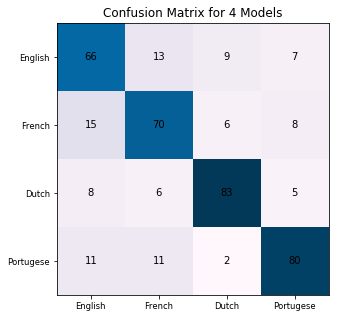

In [25]:
mat_y_true = [0]*100 + [1]*100 + [2]*100 + [3]*100
#print (mat_y_true)
mat = np.column_stack((res_from_E, res_from_F, res_from_D, res_from_P))
mat_y_pred = np.argmax(mat, axis=1)
#print (mat_y_pred)
print (len(mat_y_true))
print (len(mat_y_pred))


cf = confusion_matrix(mat_y_pred,mat_y_true)
labels = ['English', 'French', 'Dutch', 'Portugese']
plt.figure(figsize=(5, 5))
plt.imshow(cf, cmap = 'PuBu')
for y in range(4):
    for x in range(4):
        plt.text(x , y, cf[y][x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
plt.xticks(range(len(cf)), labels, size='small')
plt.yticks(range(len(cf)), labels, size='small')
plt.title('Confusion Matrix for 4 Models')
plt.show()

As can be seen, the accuracies for each of the languages reduces in comparison to when we created models for just English and French. This is because the data set sizes aren't that big and so the models are not trained to such a great extent to differentiate clearly between words belonging to one language over another. As such, it is very much possible that since the characters used in each of the languages are more or less the same, words can be mistaken as part of one language over another. Moreover, since the classification depends on probabilities assigned to the classes and not hardcore 1s and 0s, slight changes of probability can completely change the class that the word belongs to.

From the above matrix, it seems the Dutch model is performing the best followed by Portugese.